<a href="https://colab.research.google.com/github/TomPhanAnh/Kaggle-Solution/blob/main/EDA_on_Data_Science_Job_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **About Dataset**

Data Science Job Salaries Dataset contains 11 columns, each are:
1. **work_year:** The year the salary was paid.
2. **experience_level:** The experience level in the job during the year
3. **employment_type:** The type of employment for the role
4. **job_title:** The role worked in during the year.
5. **salary:** The total gross salary amount paid.
6. **salary_currency:** The currency of the salary paid as an ISO 4217 currency code.
7. **salaryinusd:** The salary in USD
8. **employee_residence:** Employee's primary country of residence in during the work year as an ISO 3166 country code.
9. **remote_ratio:** The overall amount of work done remotely
10. **company_location:** The country of the employer's main office or contracting branch
11. **company_size:** The median number of people that worked for the company during the year

## **Notebook Objective**

### **Goal of the notebook is to:**
1. 📊Explore **every feature** in the dataset;

2. 🗓**Work Year Analysis**(with **Salary, Remote Ratio);**

3. 📝**Experience Level Analysis** (with **Employment Type, Top 3 Job Title, Company Size);**

4. 🗺️**Company Location Analysis** (with Experience Level)

5. 💰💵**Salary Analysis** (with **Work Year, Experience Level, Company Size, Job Title, Remote Ratio)**

In [ ]:
!pip install country_converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# data manipulation
import pandas as pd
import numpy as np
import country_converter as coco

#Data visualizaion
import matplotlib.pyplot as plt
import matplotlib as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud

# nltk
import nltk

# Read dataframe(drop 3 columns)
df = pd.read_csv("/content/ds_salaries.csv")
df.drop(df[['salary','salary_currency','Unnamed: 0']],axis=1, inplace=True)

In [ ]:
print(df.shape)
df.tail(3)

(607, 9)


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,IN,100,US,L


**Finally, we got 9 columns with 607 rows**

**3 numeric columns:** (1) work_year, (2) salary_in_usd (3) remote_ratio

**6 categorical columns:** (1) experience_level (2) employment_type (3) job_title (4) employee_brand (5) company_location (6) company_size

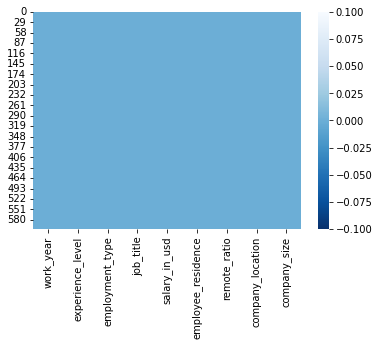

In [ ]:
sns.heatmap(df.isnull(), cmap = "Blues_r")

## **2. Univariate Analysis 📊 (explore each columns)**

In this section, we'll explore each columns in the dataset to see the distribution of features, and to get some usefull informations.

Mainly two parts in the section: Analysis on categorical columns; Analysis on numeric columns.

### **Categorical Columns**

6 categorical columns in the dataset:

* Experiece Level
* Job Titles
* Employment Type
* Employee Resdience
* Company Location
* Company Size.

#### **2.1.1 Experience Level**

EN, which refers to Entry-level / Junior

MI, which refers to Mid-level / Intermediate

SE, which refers to Senior-level / Expert

EX, which refers to Executive-level / Director

In [ ]:
abbre_title = {"EN":"Entry-Level/Junior",
               "MI":"Mid-level/Intermedia",
               "SE":"Senior-level/Expert",
               "EX":"Executive-level/Director"}
df["experience_level"] = df["experience_level"].map(abbre_title)               

In [ ]:
ex_level = df["experience_level"].value_counts()
fig = px.treemap(ex_level, 
                 path = [ex_level.index],
                 values = ex_level.values,
                 title = "Experience Level",
                 color = ex_level.index,
                 color_discrete_sequence = px.colors.sequential.PuBuGn,
                 template = "plotly_dark",
                 width = 1000,
                 height = 500)
percents = np.round((100*ex_level.values/sum(ex_level.values)).tolist(),2)
fig.data[0].customdata = [35.09, 46.13, 4.28, 14.5]
fig.data[0].texttemplate = "%{label}<b>%{value}<b>%{customdata}%"

fig.update_layout(
    font = dict(size = 17, family = "Franklin Gothic")
)
fig.show()

#### **2.1.2 Job Titles**

1. **How many** job titles in dataset?
2. Which are **top 10 frequency** job titles?

In [ ]:
print("How many job titles in the dataset: ", df["job_title"].value_counts().size)

How many job titles in the dataset:  50


**Seen as above, there's 50 job titles in the dataset.**

plot a bar chart to see top 10 job titles below:

In [ ]:
top10_job_title = df["job_title"].value_counts()[:10]
fig = px.bar(y = top10_job_title.values,
             x = top10_job_title.index,
             color = top10_job_title.index,
             color_discrete_sequence = px.colors.sequential.PuBuGn,
             text = top10_job_title.values,
             title = "Top 10 Job Titles",
             template = "plotly_dark")
fig.update_layout(
    xaxis_title = "Job Titles",
    yaxis_title = "count",
    font = dict(size = 17)
)

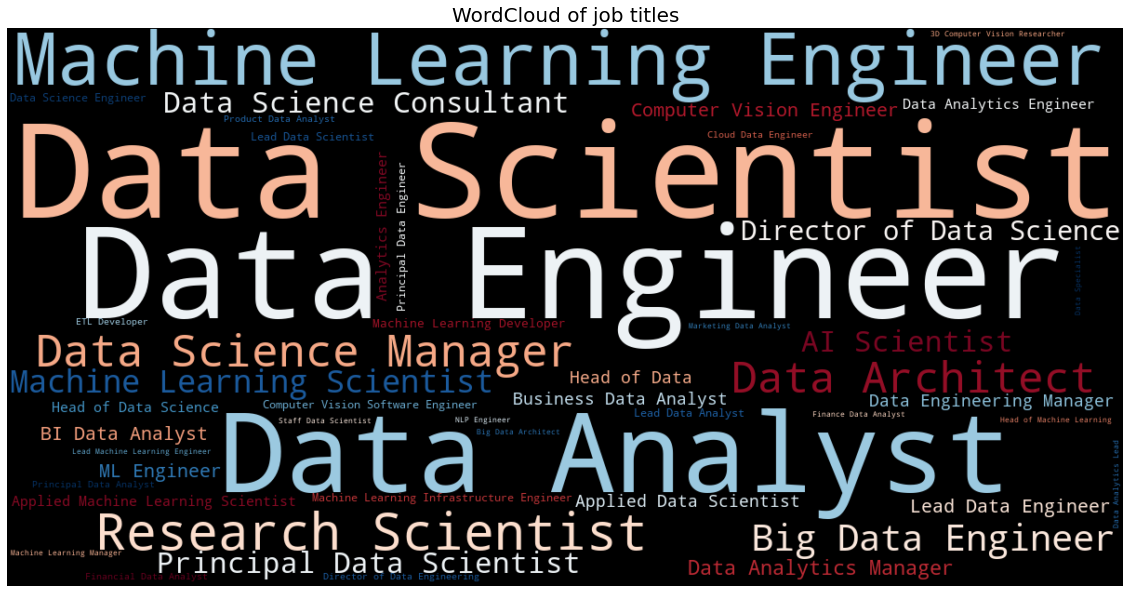

In [ ]:
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

def Word_Cloud(data, color_background, colormap, title):
    figure(figsize = (20,15))
    wc = WordCloud(width=1200, 
               height=600, 
               max_words=50,
               colormap= colormap,
               max_font_size = 150,
               random_state=88, 
               background_color=color_background).generate_from_frequencies(data)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

freq_df = Freq_df(df['job_title'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data ,'black','RdBu', 'WordCloud of job titles')

#### **2.1.3 Employment Type**

4 Employment type here, each are:
* PT: Part-time
* FT: Full-time
* CT: Contract
* FL: Freelancer

In [ ]:
type_grouped = df["employment_type"].value_counts()
fig = px.bar(x = type_grouped.index, y = type_grouped.values,
             color = type_grouped.index,
             color_discrete_sequence = px.colors.sequential.BuPu,
             template = "plotly_dark",
             text = type_grouped.values, title = "Employment Type Distribution")
fig.update_layout(
    xaxis_title = "Employment Type",
    yaxis_title = "count",
    font = dict(size = 17, family = "Franklin Gothic")
)
fig.update_traces(width = 0.5)
fig.show()

#### **2.1.4. Employee Residence & Company Location**
We'll explore employee's residence and company location by plotting map & bar charts in this section.

convert country into choropleth readable type:

In [ ]:
converted_country = coco.convert(names = df["employee_residence"], to = "ISO3")
df["employee_residence"] = converted_country

In [ ]:
residence = df["employee_residence"].value_counts()
fig = px.choropleth(locations = residence.index, 
                    color = residence.values,
                    color_continuous_scale = px.colors.sequential.YlGn,
                    
                    title = "Employee Location Distribution Map")
fig.update_layout(font = dict(size = 17, family = "Frankin Gothic"))
fig.show()

**From above, it is obvious that most of the employees are from USA, and bar plot below**

In [ ]:
top10_employee_location = residence[:10]
fig = px.bar(y = top10_employee_location.values,
             x = top10_employee_location.index,
             color = top10_employee_location.index,
             color_discrete_sequence = px.colors.sequential.deep,
             text = top10_employee_location.values,
             title = "Top 10 location of Employee")
fig.update_layout(
    xaxis_title = "Location of Employee",
    yaxis_title = "count",
    font = dict(size = 17, family = "Franklin Gothic")
  
)
fig.show()

In [ ]:
converted_country = coco.convert(names = df["company_location"], to = "ISO3")
df["company_location"] = converted_country
c_location = df["company_location"].value_counts()
top_10_company_location = c_location[:10]
fig = go.Figure(data = [
    go.Bar(name = "Employee Location",
           x = top10_employee_location.index, y = top10_employee_location.values,
           text = top10_employee_location.values, 
           marker_color = "crimson"),
    go.Bar(name = "Company Location", 
           x = top_10_company_location.index, y = top_10_company_location.values,
           marker_color = "white")       
]) 
fig.update_layout(barmode = "group", xaxis_tickangle = 45,
                  title = "Comparison of Employee Location and Company Location",
                  font = dict(size = 17, family = "Franklin Gothic"))

fig.show()

#### **2.1.5 Company Size**

In [ ]:
grouped_size = df["company_size"].value_counts()
fig = px.bar(y = grouped_size.values,
             x = grouped_size.index,
             color = grouped_size.index,
             color_discrete_sequence = px.colors.sequential.dense,
             text = grouped_size.values,
             title = "Distribution of Company Size")

fig.update_traces(width = 0.4)
fig.update_layout(
    xaxis_title = "Company Size",
    yaxis_title = "count",
    font = dict(size = 17, family = "Franklin Gothic")
)
fig.show()

It can be easily seen that **Company size** mostly consists of **medium size**, and the **large size** ranked the next.

### **2.2 Explore Numeric Columns**

We'll explore 3 numeric columns in this section, each:
* **work_year**: The year the salary was paid
* **salary_in_usd**: The salary in USD
* **remote_ration**: The overall amount of work done remotely

#### **2.2.1 Work Year**

In [ ]:
wkyears = df["work_year"].value_counts()
fig = px.pie(values = wkyears.values,
             names = wkyears.index,
             color_discrete_sequence = px.colors.sequential.PuBu,
             title = "Work Year Distribtution")
fig.update_traces(textinfo = "label + percent + value", 
                  textfont_size = 18,
                  marker = dict(line = dict(color = "antiquewhite", width = 0.2)))
fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = 'gray'
fig.update_layout(
    font = dict(size = 20, family = "Franklin Gothic")
    )
fig.show()

2022 year data accounts for 52.4% in the dataset, the next is 2021, which accounts for 35.7%.

#### **2.2.2 Salary in USD**

***used box plot& distplot to see the distribution of Salary in USD***

In [ ]:
hist_data = [df['salary_in_usd']]
group_labels = ["salary_in_usd"]
fig1 = px.box(y = df['salary_in_usd'],
              title = "Salary in USD (BoxPlot)")
fig2 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2.layout.template = "plotly_dark"
fig1.update_layout(font = dict(size = 17, family = "Frankin Gothic"))
fig1.show()
fig2.show()

#### **2.2.3 Remote Ration**

Remote Ration consists of 3 values: 100, 50, 00 possible values are as follows;
* **0: No remote work (less than 20%)**
* **50 Partially remote**
* **100 Fully remote (more than 80%)**

In [ ]:
remote_type = ["Fully Remote", "Partially Remote","No Remote Work"]

plt.figure(figsize = (20,5))
fig = px.bar( x =["Fully Remote","Partially Remote","No Remote Work"],
              y =df["remote_ratio"].value_counts().values,
             color = remote_type,
             color_discrete_sequence = px.colors.sequential.dense,
             text = df["remote_ratio"].value_counts().values,
             title = "Remote Ration Distribution",
             )

fig.update_traces(width = .4)
fig.data[0].marker.line.width = 2

fig.update_layout(
    xaxis_title = "Remote Type",
    yaxis_title = "count",
    font = dict(size = 17, family = "Franklin Gothic")
)
fig.show()


<Figure size 1440x360 with 0 Axes>

381 of works are fully **remoted**, no remote Work rank the next, with count of 127. 

## **3. Work Year Analysis**

We'll do analysis on **Remote Ratio** by **Work Year** in this section to explore whether remote ration affected by work year.

#### **3.1 Remote Ratio Work Year**

**Plot Rader plot to observe relations between Remote Ratio and Work Year below**

In [ ]:
remote_year = df.groupby(["work_year","remote_ratio"]).size()
ratio_2020 = np.round(remote_year[2020].values/remote_year[2020].values.sum(),2)
ratio_2021 = np.round(remote_year[2021].values/remote_year[2021].values.sum(),2)
ratio_2022 = np.round(remote_year[2022].values/remote_year[2022].values.sum(),2)

fig = go.Figure()
categories = ["No Remote Work","Partially Remote","Fully Remote"]
fig.add_traces(
    go.Scatterpolar(
        r = ratio_2020,
        theta = categories,
        fill = "toself",
        name = "2020 remote Ratio"
    ))
fig.add_traces(go.Scatterpolar(
    r = ratio_2021,
    theta = categories,
    fill = "toself",
    name = "2021 remote Ration"
))
fig.add_traces(go.Scatterpolar(
    r = ratio_2022,
    theta = categories,
    fill = "toself",
    name = "2022 remote ratio"
))

fig.update_layout(
    polar = dict(
        radialaxis = dict(
    range = [0,0.75]
    )),
    font = dict(family = "Franklin Gothic", size = 17),
    showlegend = True,
    title = "Remote Ratio by Work Year")
fig.layout.template = "plotly_dark"
fig.show()

We can notice that 72% of companies adopt fully remote work in 2022 year, which is the largest ratio among 2021 year and 2022 year.

### **4. Experience Level Analysis**

3 main parts in section 4, each are:
* 1. **Employment Type** by Experience Level
* 2. **Top 3 Job Title** by Experience level
* 3. **Company Size** by Experience level

#### **4.1 Employment Type by Experience Level**

In [ ]:
exlevel_type = df.groupby(["experience_level","employment_type"]).size()
fig = go.Figure(data = [
    go.Bar(name = "Entry-Level/Junior", 
           x = exlevel_type["Entry-Level/Junior"].index,
           y = exlevel_type["Entry-Level/Junior"].values, 
           text = exlevel_type["Entry-Level/Junior"].values,
           marker_color = "white"),
    go.Bar(name = "Executive-level/Director", 
           x = exlevel_type["Executive-level/Director"].index,
           y = exlevel_type["Executive-level/Director"].values,
           text = exlevel_type["Executive-level/Director"].values,
           marker_color = "red"),
    go.Bar(name = "Mid-level/Intermedia",
           x = exlevel_type["Mid-level/Intermedia"].index,
           y = exlevel_type["Mid-level/Intermedia"].values,
           text = exlevel_type["Mid-level/Intermedia"].values,
           marker_color = "yellow"),
    go.Bar(name = "Senior-level/Expert", 
           x = exlevel_type["Senior-level/Expert"].index,
           y = exlevel_type["Senior-level/Expert"].values,
           text = exlevel_type["Senior-level/Expert"].values,
           marker_color = "blue")
])
fig.update_layout(xaxis_tickangle = -45,
                  title = "Experience Level with Employemnt Type",
                  font = dict(family = "Franklin Gothic", size = 17))
fig.show()

We can see that type of **Part-time** consists of **Entry-level** and **Mid-level**. Additionally, type of **Freelancer** consists of **Mid-level** and **Senior-level**.

#### **4.2 Top 3 Job Title by Experience Level**

In [ ]:
exlevel_job = df.groupby(["experience_level","job_title"]).size()
entry_top3  = exlevel_job["Entry-Level/Junior"].sort_values(ascending = False)[:3]
executive_top3 = exlevel_job["Executive-level/Director"].sort_values(ascending = False)[:3]
mid_top3 = exlevel_job["Mid-level/Intermedia"].sort_values(ascending = False)[:3]
senior_top3 = exlevel_job["Senior-level/Expert"].sort_values(ascending = False)[:3]

exlevel_type = df.groupby(["experience_level","employment_type"]).size()
fig = go.Figure(data = [
    go.Bar(name = "Entry-Level/Junior",
           x = entry_top3.index, 
           y = entry_top3.values,
           text = entry_top3.values,
           marker_color = "white"
           ),
    go.Bar(name = "Executive-level/Director",
           x = executive_top3.index, 
           y = executive_top3.values,
           text = executive_top3.values,
           marker_color = "red"),
    go.Bar(name = "Mid-level/Intermedia",
           x = mid_top3.index,
           y = mid_top3.values,
           text = mid_top3.values,
           marker_color = "blue"),
    go.Bar(name = "Senior-level/Expert",
           x = senior_top3.index,
           y = senior_top3.values,
           text = senior_top3.values,
           marker_color = "yellow")
])
fig.update_layout(barmode = "stack", xaxis_tickangle = -45,
                  title = "Experience Level with top 3 job title",
                  font = dict(family = "Franklin Gothic", size = 15))
fig.show()

* 1. **Entry-level/Junior** tends to have **data scientist position** rather than data analysit and data engineer.
* 2. **Mid-level/Intermediate** tends to have **data scientis** and **data engineer position** rather than analyst;
* 3. Obviously, there's no data scientist and analyst job with **Executive level/Director**, and tends to have **data engineer** and **director position**.


#### **4.3 Company Size by Experience Level**

In [ ]:
exlevel_size = df.groupby(["experience_level","company_size"]).size()
fig = go.Figure(data = [
    go.Bar(name = "Entry-Level/Junior",
           x = exlevel_size["Entry-Level/Junior"].index,
           y = exlevel_size["Entry-Level/Junior"].values,
           text = exlevel_size["Entry-Level/Junior"].values,
           marker_color = "white"),

    go.Bar(name='Executive-level/Director', 
          x=exlevel_size['Executive-level/Director'].index,
          y=exlevel_size['Executive-level/Director'].values,
          text=exlevel_size['Executive-level/Director'].values, 
          marker_color='red'),

    go.Bar(name = "Mid-level/Intermedia",
           x = exlevel_size["Mid-level/Intermedia"].index,
           y = exlevel_size["Mid-level/Intermedia"].values,
           text = exlevel_size["Mid-level/Intermedia"].values,
           marker_color = "yellow"),

    go.Bar(name = "Senior-level/Expert", 
           x = exlevel_size["Senior-level/Expert"].index,
           y = exlevel_size["Senior-level/Expert"].values,
           text = exlevel_size["Senior-level/Expert"].values,
           marker_color = "blue")])

fig.update_layout(xaxis_tickangle = -45, title = "Experience Title with Company Size",
                  font = dict(family = "Franklin Gothic", 
                              size = 17))
fig.show()

We can notice that most of **Senior-level/Expert** works in **medium size** of the company.

### **5. Company location Analysis**

Here, we'll explore company location by experience level using map plot.

#### **5.1 Experience Level**

In [ ]:
exlevel_location = df.groupby(["experience_level","company_location"]).size()

entry_location = exlevel_location["Entry-Level/Junior"]
executive_location = exlevel_location["Executive-level/Director"]
mid_location = exlevel_location["Mid-level/Intermedia"]
senior_location = exlevel_location["Senior-level/Expert"]

fig1 = px.choropleth(locations = entry_location.index,
                     color = entry_location.values,
                     color_continuous_scale = px.colors.sequential.Peach,
                     title = "Entry-Level/Junior Company Location")
fig2 = px.choropleth(locations = executive_location.index,
                     color = executive_location.values,
                     color_continuous_scale = px.colors.sequential.dense,
                     title = "Mid-level/Intermediate Company Location")
fig3 = px.choropleth(locations = mid_location.index,
                     color = mid_location.values,
                     color_continuous_scale = px.colors.sequential.GnBu,
                     title = "Senior-level/Expert Company Location")
fig4 = px.choropleth(locations = senior_location.index,
                     color = senior_location.values,
                     color_continuous_scale = px.colors.sequential.PuRd,
                     title = "Executive-level/Director Company Location")
fig1.add_scattergeo(
    locations = entry_location.index,
    text = entry_location.values,
    mode ="text")
fig2.add_scattergeo(
    locations = mid_location.index,
    text = mid_location.values,
    mode = "text")
fig3.add_scattergeo(
    locations = senior_location.index,
    text = senior_location.values,
    mode = "text")
fig4.add_scattergeo(
    locations = executive_location.index,
    text = executive_location.values,
    mode = "text")

fig1.update_layout(font = dict(size = 17, family="Franklin Gothic"))
fig2.update_layout(font = dict(size = 17, family="Franklin Gothic"))
fig3.update_layout(font = dict(size = 17, family="Franklin Gothic"))
fig4.update_layout(font = dict(size = 17, family="Franklin Gothic"))

fig1.show()
fig2.show()
fig3.show()
fig4.show()

### **6.Salary Analysis**

The part "Salary Analysis" consists of  parts, each are
1. Salary by Work Year
2. Salary by Experience Level
3. Salary by Company Size
4. Highest salary by Job Titles
5. Average Salary by Company Location

#### **6.1 Salary by work year**

In [ ]:
w2020 = df.loc[(df["work_year"] == 2020)]
w2021 = df.loc[(df["work_year"] == 2021)]
w2022 = df.loc[(df["work_year"] == 2022)]

hist_data = [w2020["salary_in_usd"],w2021["salary_in_usd"],w2022["salary_in_usd"]]
group_labels = ["2020 salary","2021 salary","2022 salary"]
colors = ["white","red","blue"]

year_salary = pd.DataFrame(columns = ["2020","2021","2022"])
year_salary["2020"] = w2020.groupby("work_year").mean("salary_in_usd")["salary_in_usd"].values
year_salary["2021"] = w2021.groupby("work_year").mean("salary_in_usd")["salary_in_usd"].values
year_salary["2022"] = w2022.groupby("work_year").mean("salary_in_usd")["salary_in_usd"].values

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False, colors = colors)
fig2 = go.Figure(data = px.bar(x = year_salary.columns,
                               y = year_salary.values.tolist()[0],
                               color = year_salary.columns,
                               color_discrete_sequence =colors,
                               title = "2. Mean Salary by Work Year",
                               text = np.round([num/1000 for num in year_salary.values.tolist()[0]],2),
                               height = 500))
fig1.update_layout(title = "1. Salary Distribution by Work Year",
                  font = dict(size = 17, family = "Franklin Gothic"))
fig2.update_traces(width = 0.4)
fig2.update_layout(
    xaxis_title = "Work Year",
    yaxis_title = "Mean Salary (k)",
    font = dict(size = 17, family = "Frankin Gothic")
)
fig1.show()
fig2.show()

#### **6.2 Salary by Experience Level**

In [ ]:
exlevel_salary = df[["experience_level","salary_in_usd"]]

entry_salary = exlevel_salary.loc[exlevel_salary["experience_level"] == "Entry-Level/Junior"]
executive_salary = exlevel_salary.loc[exlevel_salary["experience_level"] == "Executive-level/Director"]
mid_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Mid-level/Intermedia']
senior_salary = exlevel_salary.loc[exlevel_salary["experience_level"] == "Senior-level/Expert"]

hist_data = [entry_salary['salary_in_usd'],
             mid_salary['salary_in_usd'],
             senior_salary['salary_in_usd'],
             executive_salary['salary_in_usd']]
group_labels = ['Entry-level/Junior','Mid-level/Intermediate','Senior-level/Expert','Executive-level/Director']

colors = ['white','yellow','blue','red']

lst = [entry_salary['salary_in_usd'].mean(),
       mid_salary['salary_in_usd'].mean(),
       senior_salary['salary_in_usd'].mean(),
       executive_salary['salary_in_usd'].mean()]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False, colors = colors)
fig2 = go.Figure(data = px.bar(x = group_labels,
                               y = lst,
                               color = group_labels,
                               color_discrete_sequence = colors,
                               title = "2. Mean Salary by Experience Level",
                               text = np.round([num/1000 for num in lst],2),
                               height = 500))

fig.update_layout(title = "1. Salary Distribution by Experience Level",
                  font = dict(size = 17, family = "Franklin Gothic"))
fig2.update_traces(width = .5)
fig2.update_layout(
    xaxis_title = "Experience Level",
    yaxis_title = "Mean Salary (k)",
    font = dict(size = 17, family = "Franklin Gothic")
)
fig1.show()
fig2.show()

#### **6.3 Salary by Company Size**

In [ ]:
c_size= df[['company_size',"salary_in_usd"]]
small = exlevel_salary.loc[c_size["company_size"] == "S"]
mid   = exlevel_salary.loc[c_size["company_size"] == "M"]
large = exlevel_salary.loc[c_size["company_size"] == "L"]

hist_data = [small['salary_in_usd'],mid['salary_in_usd'],large['salary_in_usd']]
group_labels = ['Company Size: Small','Company Size: Mid','Company Size: Large']
colors = ['white','red','blue']

lst = [small['salary_in_usd'].mean(),
       mid['salary_in_usd'].mean(),
       large['salary_in_usd'].mean()]

plt.figure(figsize = (20,5))
fgi1 = ff.create_distplot(hist_data, group_labels, show_hist = False,
                          colors = colors)

fig2 = go.Figure(data = px.bar(x = group_labels,
                               y = lst,
                               color = group_labels,
                               color_discrete_sequence = colors,
                               title = "2.Mean Salary by Company Size",
                               text = np.round([num/1000 for num in lst],2),
                               height = 500))

fig1.update_layout(title='1. Salary Distribution by Company Size',
                   font = dict(size=17,family="Franklin Gothic"))
fig2.update_traces(width=0.4)
fig2.update_layout(
    xaxis_title="Company Size",
    yaxis_title="Mean Salary (k)",
    font = dict(size=17,family="Franklin Gothic"))
fig1.show()
fig2.show()

<Figure size 1440x360 with 0 Axes>

White, yellow and blue lines each stand for Small, Mid, Large size of company.
It is obvious that Mid size of company distributed along with higher salaries, and Large size company has higher salaries than Small size company.
Thus, we can get a conclusion as large size company not necessarily has higher salaries than mid size company.

#### **6.4 Highest salaries by Job Title**

In [ ]:
salary_job = df.groupby(['salary_in_usd',"job_title"]).size().reset_index()
salary_job = salary_job[-20:]
fig = px.bar(x = salary_job["job_title"], 
             y = salary_job["salary_in_usd"],
             text = salary_job["salary_in_usd"],
             color = salary_job["salary_in_usd"],
             color_discrete_sequence = px.colors.sequential.PuBu)

fig.update_layout(
    xaxis_title = "Job Title",
    yaxis_title = "Mean Salary")

fig.update_layout(barmode = "relative",
                  xaxis_tickangle = -45,
                  title = "Top 20 Highest Salary by Job title",
                  font = dict(size = 17, family = "Franklin Gothic"))

#### **6.5 Average Salary by Company Location**

In [ ]:
salary_location = df.groupby(["salary_in_usd","company_location"]).size().reset_index()
average = salary_location.groupby("company_location").mean().reset_index()

fig = px.choropleth(locations = average["company_location"],
                    color = average["salary_in_usd"],
                    color_continuous_scale = px.colors.sequential.solar,
                    title = "Average Salary by Company Location")

fig.update_layout(font = dict(size = 17, family = "Franklin Gothic"))
fig.show()

Higher average salaries have brighter colours, while lower average salaries have darker colours.
Here, we can see that USA and Russia have higher average salaries and brighter colours.

Text(0.5, 1.0, 'Confusion Matrix')

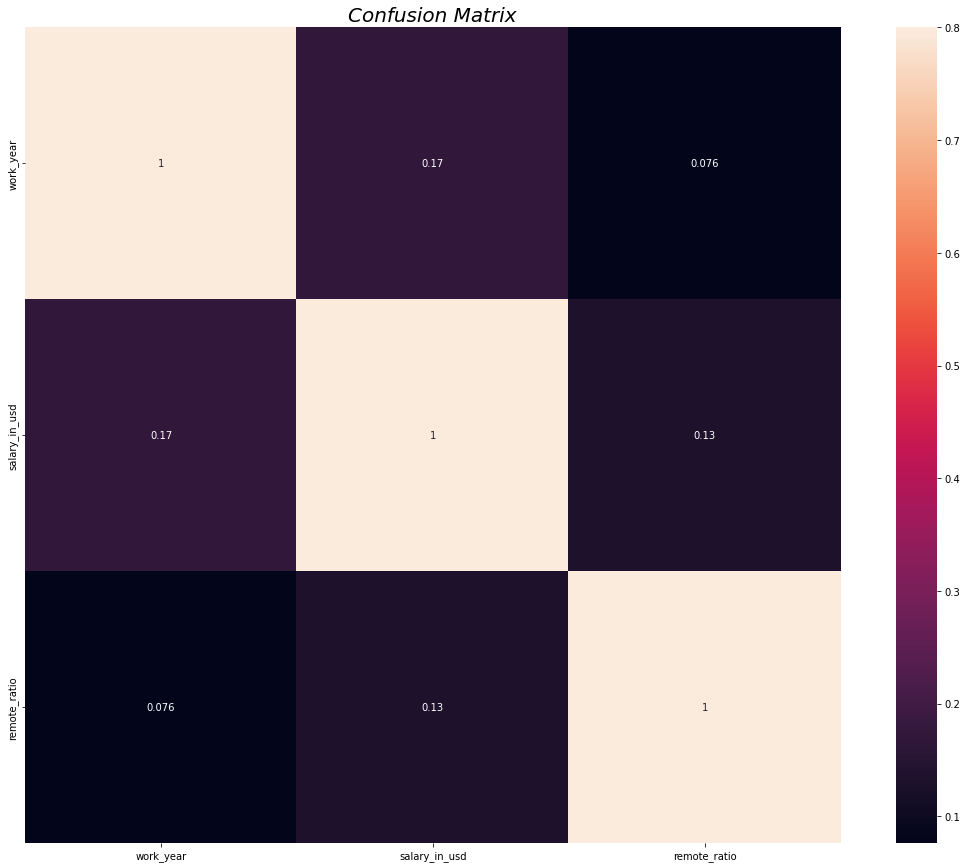

In [ ]:
fig, ax = plt.subplots() 
fig.set_size_inches(20,15)
sns.heatmap(df.corr(), vmax =.8, square = True, annot = True)
plt.title('Confusion Matrix',fontsize=20,fontstyle= 'oblique')